In [4]:
import numpy as np
import pandas as pd
import datetime
import urllib.request
import netCDF4
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y %m %d %H %M')

wind2009 = pd.read_csv('./wind2009.txt', delim_whitespace=True, parse_dates=[[0, 1, 2, 3, 4]],\
                       date_parser=dateparse, header=[0,1]) #,parse_dates=['date'], index_col='date'
# njdep = njdep.drop('id', axis=1)
# njdep = njdep.drop('time', axis=1)
wind2009

('#YY', '#yr')_('MM', 'mo')_('DD', 'dy')_('hh', 'hr')_('mm', 'mn')  \
0                                    2008-12-31 23:00:00                   
1                                    2008-12-31 23:10:00                   
2                                    2008-12-31 23:20:00                   
3                                    2008-12-31 23:30:00                   
4                                    2008-12-31 23:40:00                   
...                                                  ...                   
51829                                2009-12-31 22:10:00                   
51830                                2009-12-31 22:20:00                   
51831                                2009-12-31 22:30:00                   
51832                                2009-12-31 22:40:00                   
51833                                2009-12-31 22:50:00                   

       (WDIR, degT)  (WSPD, m/s)  (GDR, degT)  (GST, m/s)  (GTIME, hhmm)  
0               315         15.7          999        99.0           9999  
1               307         16.8          999        99.0           9999  
2               310         16.7          999        99.0           9999  
3               316         15.7          999        99.0           9999  
4               309         15.4          999        99.0           9999  
...             ...          ...          ...         ...            ...  
51829             6          2.4          999        99.0           9999  
51830             6          2.8          999        99.0           9999  
51831            23          2.8          999        99.0           9999  
51832            33          3.0          999        99.0           9999  
51833            48          3.1           47         4.0           2244  

[51834 rows x 6 columns]

In [6]:
type(wind2009.iloc[0][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
wind2009 = wind2009.rename(columns={"('#YY', '#yr')_('MM', 'mo')_('DD', 'dy')_('hh', 'hr')_('mm', 'mn')": "Time"})

In [8]:
list(wind2009)

['Time',
 ('WDIR', 'degT'),
 ('WSPD', 'm/s'),
 ('GDR', 'degT'),
 ('GST', 'm/s'),
 ('GTIME', 'hhmm')]

(733528.0, 733542.0)

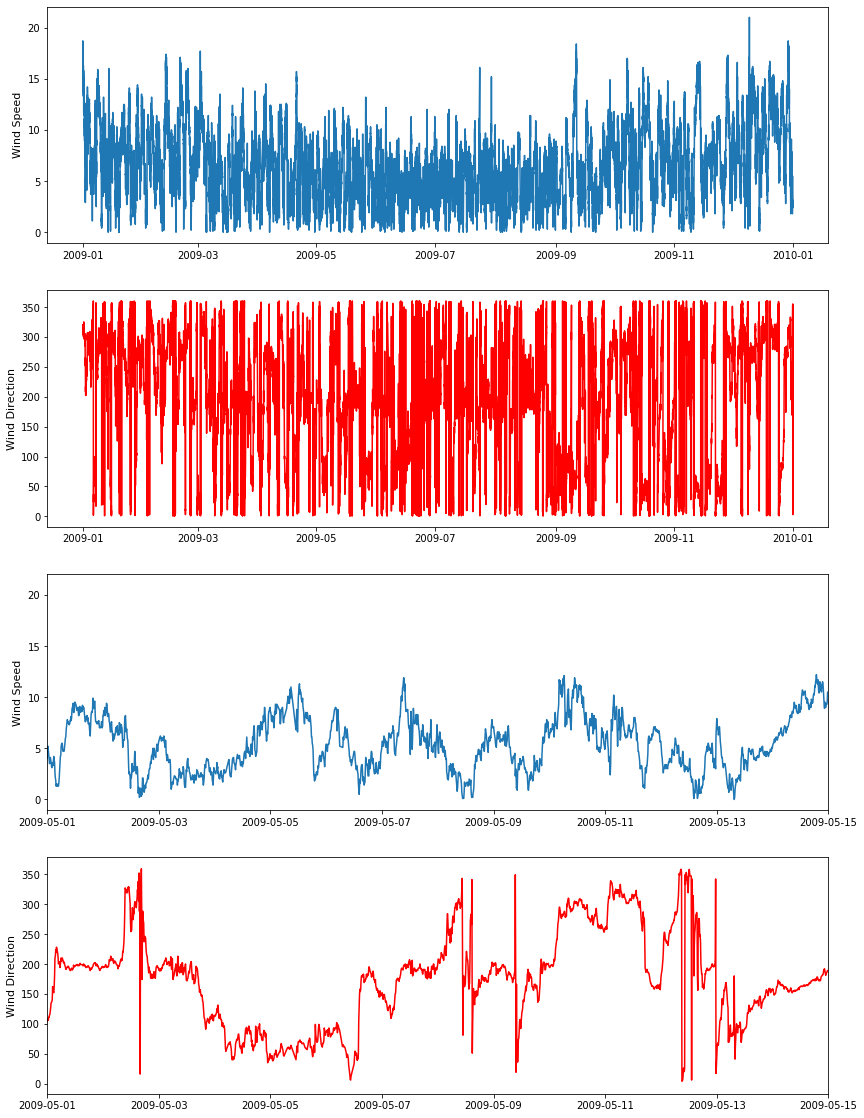

In [20]:
fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,20))

ax[0].plot(wind2009.Time,wind2009[('WSPD', 'm/s')])
ax[0].set_ylabel('Wind Speed', fontsize=11)

ax[1].plot(wind2009.Time,wind2009[('WDIR', 'degT')], c="r")
ax[1].set_ylabel('Wind Direction', fontsize=11)

ax[2].plot(wind2009.Time,wind2009[('WSPD', 'm/s')])
ax[2].set_ylabel('Wind Speed', fontsize=11)
ax[2].set_xlim(pd.Timestamp('2009-05-01'), pd.Timestamp('2009-05-15'))

ax[3].plot(wind2009.Time,wind2009[('WDIR', 'degT')], c="r")
ax[3].set_ylabel('Wind Direction', fontsize=11)
ax[3].set_xlim(pd.Timestamp('2009-05-01'), pd.Timestamp('2009-05-15'))

# ax[0].set_title('Delaware Bay Chlorophyll - AQUA Satellite',fontsize=20)